In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [200]:
data = np.loadtxt("results/coherent_test_T10_m5e17_run.csv", delimiter=',')
eps_data = np.loadtxt("results/coherent_test_T10_m5e17_eps.csv", delimiter=',')
data.shape, eps_data.shape

((1001, 1652), (2, 206))

In [201]:
N_bins = eps_data.shape[1]
N_steps = data.shape[0]

eps = eps_data[0,:]
weights = eps_data[1,:]

In [202]:
nu_data = np.zeros((N_steps, N_bins, 4))
nubar_data = np.zeros_like(nu_data)

In [203]:
for i in range(N_steps):
    for j in range(N_bins):
        nu_data[i, j, :] = data[i, 2+4*j:2+4*j+4]
        nubar_data[i,j,:] = data[i, 2+4*N_bins+4*j:2+4*N_bins+4*j+4]

In [204]:
fe_data = np.zeros((N_steps, N_bins))
fm_data = np.zeros_like(fe_data)

febar_data = np.zeros_like(fe_data)
fmbar_data = np.zeros_like(fe_data)

In [205]:
for i in range(N_steps):
    for j in range(N_bins):
        fe_data[i, j] = 0.5 * nu_data[i, j, 0] * (1 + nu_data[i, j, 3])
        fm_data[i, j] = 0.5 * nu_data[i, j, 0] * (1 - nu_data[i, j, 3])

        febar_data[i, j] = 0.5 * nubar_data[i, j, 0] * (1 + nubar_data[i, j, 3])
        fmbar_data[i, j] = 0.5 * nubar_data[i, j, 0] * (1 - nubar_data[i, j, 3])
time = data[:,0]

Initial number distributions, $dn \propto \epsilon^2 f_\nu$

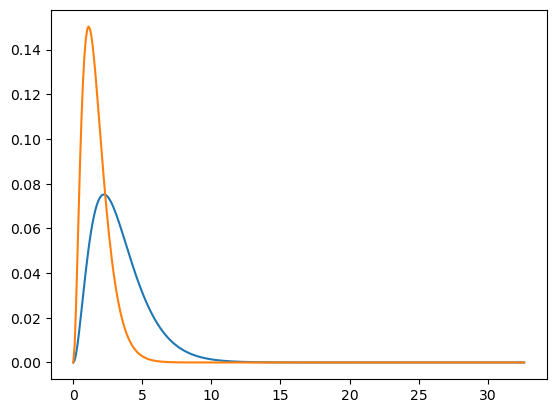

In [206]:
plt.figure()
plt.plot(eps, eps**2 * fe_data[0,:])
plt.plot(eps, eps**2 * fm_data[0,:])

Comparison of initial and final electron number density distributions

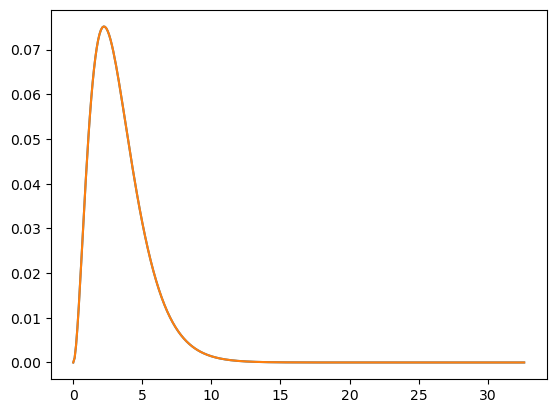

In [207]:
plt.figure()
plt.plot(eps, eps**2 * fe_data[-1,:])
plt.plot(eps, eps**2 * fe_data[0,:])

Time evolution of $f_{\nu_e}$ for the 10th $\epsilon$ bin value.

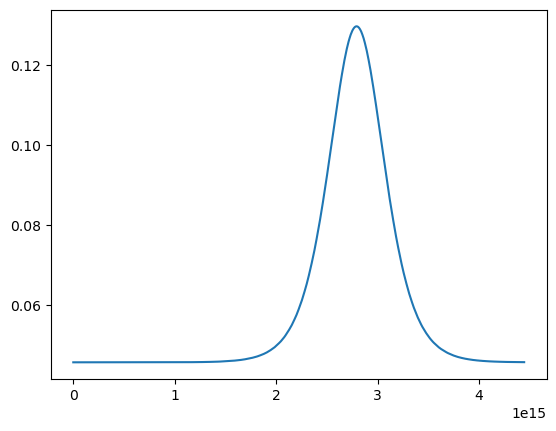

In [208]:
plt.plot(time, fe_data[:,10])

In [210]:
Le = np.zeros(len(fe_data[:,0]))
Lm = np.zeros_like(Le)

Lebar = np.zeros_like(Le)
Lmbar = np.zeros_like(Lm)

for i in range(len(Le)):
    Le[i] = np.sum(weights * eps**2 * nu_data[i,:,0] * nu_data[i,:,2])
    Lm[i] = np.sum(weights * eps**2 * fm_data[i,:])
    Lebar[i] = np.sum(weights * eps**2 * nubar_data[i,:,0] * nubar_data[i,:,2])
    Lmbar[i] = np.sum(weights * eps**2 * fmbar_data[i,:])

Total number densities of neutrino species, $n \propto \int \epsilon^2 f_\nu \,d \epsilon$

In [211]:
Le = np.zeros(len(fe_data[:,0]))
Lm = np.zeros_like(Le)

Lebar = np.zeros_like(Le)
Lmbar = np.zeros_like(Lm)

for i in range(len(Le)):
    Le[i] = np.sum(weights * eps**2 * fe_data[i,:])
    Lm[i] = np.sum(weights * eps**2 * fm_data[i,:])
    Lebar[i] = np.sum(weights * eps**2 * febar_data[i,:])
    Lmbar[i] = np.sum(weights * eps**2 * fmbar_data[i,:])

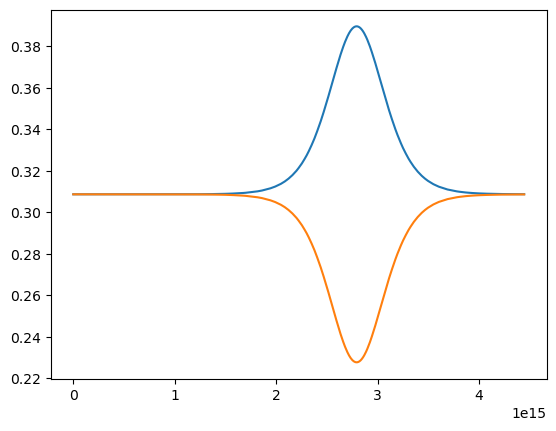

In [212]:
plt.plot(time, Le)
plt.plot(time, Lm)

Lepton numbers, $L_e \propto n_{\nu_e} - n_{\bar\nu_e}$; $L_\mu \propto n_{\nu_\mu} - n_{\bar\nu_\mu}$

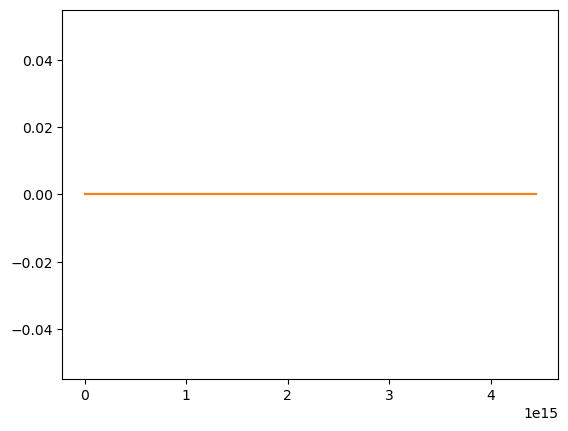

In [213]:
plt.plot(time, Le-Lebar)
plt.plot(time, Lm-Lmbar)

The density term, $\mathcal{H}_m \propto \int \epsilon^2 \, d \epsilon (\rho - \bar\rho)$. The real and imaginary parts of the off-diagonal terms:

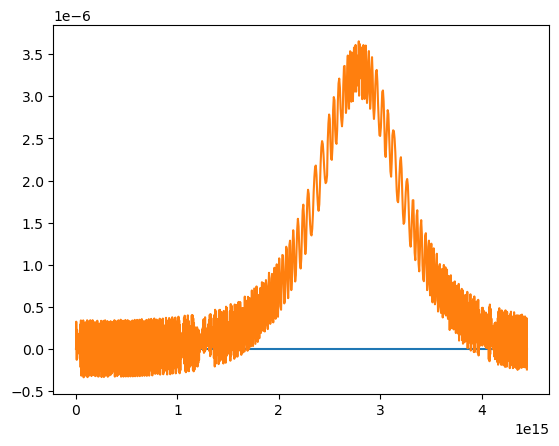

In [214]:
im_comp = np.zeros_like(time)
re_comp = np.zeros_like(time)

for i in range(len(time)):
    im_comp[i] = np.sum(weights * eps**2 * (nu_data[i,:,0] * nu_data[i,:,2] - nubar_data[i,:,0] * nubar_data[i,:,2])/2)
    re_comp[i] = np.sum(weights * eps**2 * (nu_data[i,:,0] * nu_data[i,:,1] - nubar_data[i,:,0] * nubar_data[i,:,1])/2)

plt.plot(time, re_comp)
plt.plot(time, im_comp)